In [31]:
import numpy as np
import seaborn as sns
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import os
import cv2
import tensorflow as tf
from tensorflow import keras

In [13]:
#Get images URL in a single array
images_sample = []
main_directory = "Images/Test"

for main_class in os.listdir(main_directory):
    for image in os.listdir(main_directory+"/"+main_class):
        img_route = main_directory+"/"+main_class+"/"+image
        images_sample.append(img_route)
        print(img_route)

Images/Test/bateria/bateria_-au.jpg
Images/Test/bateria/bateria_-la.jpg
Images/Test/bateria/bateria_-wi.jpg
Images/Test/bateria/bateria_29.jpg
Images/Test/bateria/bateria_39.jpg
Images/Test/bateria/bateria_79.jpg
Images/Test/bateria/bateria_ate.jpg
Images/Test/bateria/bateria_rec.jpg
Images/Test/bujia/bujia_-16.jpg
Images/Test/bujia/bujia_-19.jpg
Images/Test/bujia/bujia_-23.jpg
Images/Test/bujia/bujia_-25.jpg
Images/Test/bujia/bujia_-36.jpg
Images/Test/bujia/bujia_-6 .jpg
Images/Test/bujia/bujia_2-a.jpg
Images/Test/bujia/bujia_7.jpg
Images/Test/bujia/bujia_7EI.jpg
Images/Test/bujia/bujia_on-.jpg
Images/Test/bujia/bujia_pu3.jpg
Images/Test/bujia/bujia_s.jpg
Images/Test/piston/piston_22.jpg
Images/Test/piston/piston_23.jpg
Images/Test/piston/piston_24.jpg
Images/Test/piston/piston_3.jpg
Images/Test/piston/piston_32.jpg
Images/Test/piston/piston_41.jpg
Images/Test/piston/piston_56.jpg
Images/Test/piston/piston_78.jpg
Images/Test/piston/piston_82.jpg
Images/Test/piston/piston_88.jpg
Images

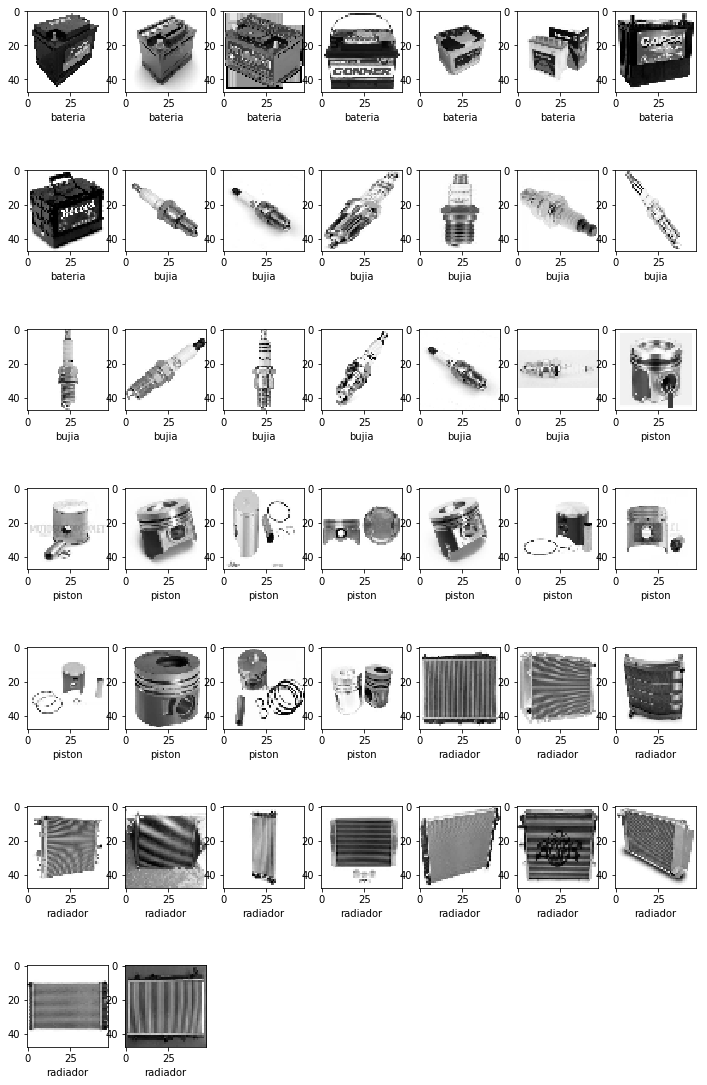

In [19]:
# size of the image: 48*48 pixels
pic_size = 48


plt.figure(0, figsize=(12,20))
cpt = 0

for piece in images_sample:
        cpt = cpt + 1
        plt.subplot(7,7,cpt)
        img = cv2.imread(piece,cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img,(48,48))
        label = str(piece.split("/")[2])
        plt.xlabel(label)
        plt.imshow(img, cmap="gray")

plt.show()

In [21]:
base_path = "Images/"
for piece in os.listdir(base_path + "Training"):
    print(str(len(os.listdir(base_path + "Training/" + piece))) + " " + piece + " images")

42 bateria images
65 bujia images
79 piston images
66 radiador images


In [34]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# number of images to feed into the NN for every batch
batch_size = 5
pic_size = 48

datagen_train = ImageDataGenerator(rotation_range=10,zoom_range=[1.2,1.8],horizontal_flip=True)
datagen_validation = ImageDataGenerator(rotation_range=10,zoom_range=[1.2,1.8],horizontal_flip=True)

train_generator = datagen_train.flow_from_directory(base_path + "Training",
                                                    target_size=(pic_size,pic_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical')

validation_generator = datagen_validation.flow_from_directory(base_path + "Test",
                                                    target_size=(pic_size,pic_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical')

Found 252 images belonging to 4 classes.
Found 44 images belonging to 4 classes.


In [35]:
validation_generator.class_indices

{'bateria': 0, 'bujia': 1, 'piston': 2, 'radiador': 3}

In [38]:
import tensorflow as tf

# Initialising the CNN
model = tf.keras.Sequential()

# 1 - Convolution
model.add(tf.keras.layers.Conv2D(64,(3,3), padding='same', input_shape=(48,48,1)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))

# 2nd Convolution layer
model.add(tf.keras.layers.Conv2D(128,(5,5), padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))

# 3rd Convolution layer
model.add(tf.keras.layers.Conv2D(512,(3,3), padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))

# 4th Convolution layer
model.add(tf.keras.layers.Conv2D(512,(3,3), padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))

# Flattening
model.add(tf.keras.layers.Flatten())

# Fully connected layer 1st layer
model.add(tf.keras.layers.Dense(256))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dropout(0.25))

# Fully connected layer 2nd layer
model.add(tf.keras.layers.Dense(512))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Dense(4, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [40]:


epochs = 20

history = model.fit_generator(generator=train_generator,
                                steps_per_epoch=train_generator.n//train_generator.batch_size,
                                epochs=epochs,
                                validation_data = validation_generator,
                                validation_steps = validation_generator.n//validation_generator.batch_size,
)

Epoch 1/20
51/51 [==============================] - 66s 1s/step - loss: 1.1034 - acc: 0.5556 - val_loss: 1.0588 - val_acc: 0.5455
Epoch 2/20
51/51 [==============================] - 66s 1s/step - loss: 0.9887 - acc: 0.6111 - val_loss: 0.9824 - val_acc: 0.5909
Epoch 3/20
51/51 [==============================] - 66s 1s/step - loss: 0.9401 - acc: 0.5952 - val_loss: 2.3494 - val_acc: 0.4318
Epoch 4/20
51/51 [==============================] - 66s 1s/step - loss: 0.9209 - acc: 0.6865 - val_loss: 1.2916 - val_acc: 0.5227
Epoch 5/20
51/51 [==============================] - 66s 1s/step - loss: 0.9598 - acc: 0.6468 - val_loss: 1.9168 - val_acc: 0.5682
Epoch 6/20
51/51 [==============================] - 65s 1s/step - loss: 0.8184 - acc: 0.7024 - val_loss: 0.7128 - val_acc: 0.7273
Epoch 7/20
51/51 [==============================] - 66s 1s/step - loss: 0.8449 - acc: 0.7024 - val_loss: 1.6021 - val_acc: 0.5455
Epoch 8/20
51/51 [==============================] - 64s 1s/step - loss: 0.8189 - acc: 0.65

In [47]:
import matplotlib.pyplot as plt
import numpy as np
clases = ['bateria', 'bujia', 'piston', 'radiador']


figura = plt.figure(figsize=(16,16))
directorio = "Images/Training"

counter = 1
for subdirectorio in os.listdir(directorio):
    for im in os.listdir(directorio+"/"+subdirectorio):
        imag = cv2.imread(directorio+"/"+subdirectorio+"/"+im,cv2.IMREAD_GRAYSCALE)
        imag = cv2.resize(imag,(48,48))
        imagen_prueba = np.expand_dims(imag,2)
        imagen_prueba = np.expand_dims(imagen_prueba,0)
        resultados = model.predict(imagen_prueba)
        etiqueta = clases[np.argmax(resultados)]
        
        print("Imagen: {} clase: {}".format(subdirectorio,etiqueta))
         
            


Imagen: bateria clase: bateria
Imagen: bateria clase: radiador
Imagen: bateria clase: bateria
Imagen: bateria clase: bateria
Imagen: bateria clase: piston
Imagen: bateria clase: bateria
Imagen: bateria clase: piston
Imagen: bateria clase: piston
Imagen: bateria clase: piston
Imagen: bateria clase: bateria
Imagen: bateria clase: piston
Imagen: bateria clase: bateria
Imagen: bateria clase: piston
Imagen: bateria clase: bateria
Imagen: bateria clase: radiador
Imagen: bateria clase: piston
Imagen: bateria clase: bateria
Imagen: bateria clase: piston
Imagen: bateria clase: piston
Imagen: bateria clase: radiador
Imagen: bateria clase: piston
Imagen: bateria clase: radiador
Imagen: bateria clase: radiador
Imagen: bateria clase: piston
Imagen: bateria clase: piston
Imagen: bateria clase: radiador
Imagen: bateria clase: piston
Imagen: bateria clase: bateria
Imagen: bateria clase: piston
Imagen: bateria clase: bateria
Imagen: bateria clase: radiador
Imagen: bateria clase: bateria
Imagen: bateria

<Figure size 1152x1152 with 0 Axes>

In [45]:
model.save("parts_detection_model.h5")

In [46]:
sm = tf.keras.models.load_model("parts_detection_model.h5")
imag = cv2.imread("Images/Training/radiador/images (72).jpg",cv2.IMREAD_GRAYSCALE)
imag = cv2.resize(imag,(48,48))
imagen_prueba = np.expand_dims(imag,2)
imagen_prueba = np.expand_dims(imagen_prueba,0)
resultados = sm.predict(imagen_prueba)
etiqueta = clases[np.argmax(resultados)]
etiqueta

'radiador'

[<tf.Tensor 'dense_2_target:0' shape=(?, ?) dtype=float32>]